In this project we will be doing technical analysis of stocks, firt we wil create a dashboard using dash library, then we will be using TA-lib to do a technical analysis on stocks. We will get data for stock  from yahoo finance using pandas-datareader library.

In [1]:
import datetime as dt
import dash 
from dash import html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import yfinance as yf 
import mplfinance as mpf
import matplotlib.pyplot as plt
import talib as ta # to install TA-lib in anaconda run "conda install -c conda-forge ta-lib" in anaconda terminal 
from pandas_datareader import data as pdr

C:\Users\Ankit\AppData\Local\Temp\ipykernel_9684\3572622312.py:4: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


# Creating Dashboard

In [2]:
stock_app = dash.Dash()
stock_app.title = "Stock Analysis using python"

stock_app.layout = html.Div(children=[html.H1("Stock Analysis using Python"),
                                     html.H5("Enter the name of stock which you want to see: "),
                                     dcc.Input(id="input", value="GOOGL", type="text"),
                                     html.Div(id="output_graph")])

In [3]:
@stock_app.callback(
    Output(component_id='output_graph', component_property='children'),
    [Input(component_id='input', component_property='value')],
)

def make_graph(input_data):
    yf.pdr_override()
    start_date = dt.datetime(2015,1,1)
    end_date = dt.datetime.now()
    try:
        df = pdr.get_data_yahoo(input_data,start=start_date, end=end_date)
        graph = dcc.Graph(id="example", figure={'data':[{'x':df.index, 'y':df.Close, 'type':'line', 'name':input_data}],
                                                'layout':{
                                                    'title':input_data
                                                }})
    except:
        graph = html.Div("Error retrieving stock data.")
    
    return graph

In [5]:
if __name__ == '__main__':
    stock_app.run_server()

[*********************100%***********************]  1 of 1 completed



In [6]:
name = input("Enter stock name:")
start_date = dt.datetime(2010,1,1)
end_date=dt.datetime.now()
df = pdr.get_data_yahoo(name,start=start_date, end=end_date)
df 

Enter stock name:GOOGL
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028
...,...,...,...,...,...,...
2023-06-23,121.379997,122.790001,121.059998,122.339996,122.339996,34885300
2023-06-26,120.760002,122.000000,118.269997,118.339996,118.339996,33969900
2023-06-27,117.080002,119.080002,116.099998,118.330002,118.330002,39535900


Let us find simple moving average and exponential moving average for this stock. 

Simple moving average - Simple moving average is moving average calculated by adding recent prices and then dividing that figure by the number of time periods in the calculation average.

Exponential moving average - Exponential moving average is a type of weighted moving average that gives more importance to recent price data.

In [8]:
def simple_moving_average(data, n=100):
    import talib as ta
    import matplotlib.pyplot as plt
    
    data["SMA"] = ta.SMA(data['Close'], n)
    
    plt.figure(figsize=(15,10))
    plt.plot(data['Close'])
    plt.plot(data["SMA"])
    plt.legend(["Close", "Simple Moving average"], loc="upper left")
    plt.show()
    
    return data

def exponential_moving_average(data, n=100):
    import talib as ta
    import matplotlib.pyplot as plt
    
    data["EMA"] = ta.EMA(data['Close'], n)
    
    plt.figure(figsize=(15,10))
    plt.plot(data['Close'])
    plt.plot(data["EMA"])
    plt.legend(["Close", "Exponential Moving average"], loc="upper left")
    plt.show()
    
    return data

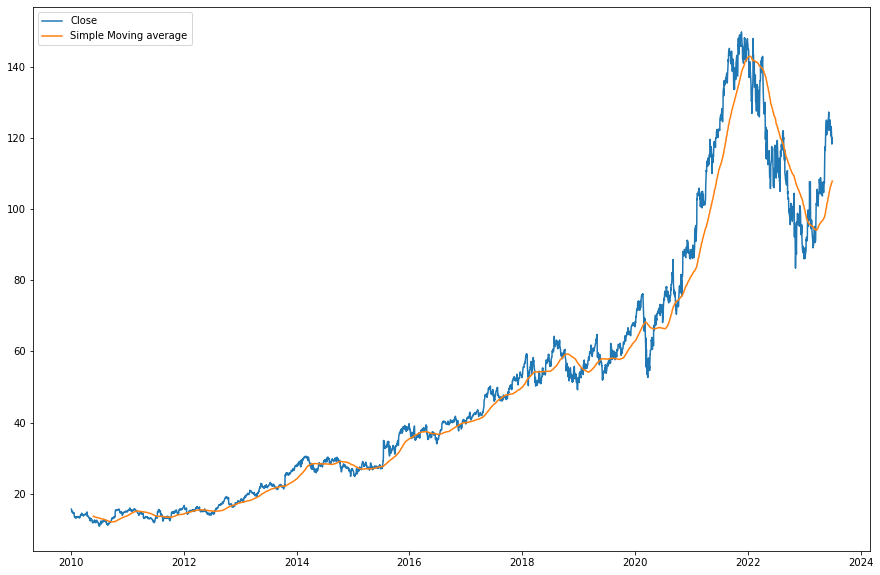

,Open,High,Low,Close,Adj Close,Volume,SMA,EMA
Date,,,,,,,,
2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752,NaN,NaN
2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812,NaN,NaN
2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852,NaN,NaN
2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428,NaN,NaN
2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-06-23,121.379997,122.790001,121.059998,122.339996,122.339996,34885300,107.2686,110.893129
2023-06-26,120.760002,122.000000,118.269997,118.339996,118.339996,33969900,107.4636,111.040592
2023-06-27,117.080002,119.080002,116.099998,118.330002,118.330002,39535900,107.6426,111.184936


In [10]:
simple_moving_average(df,100)

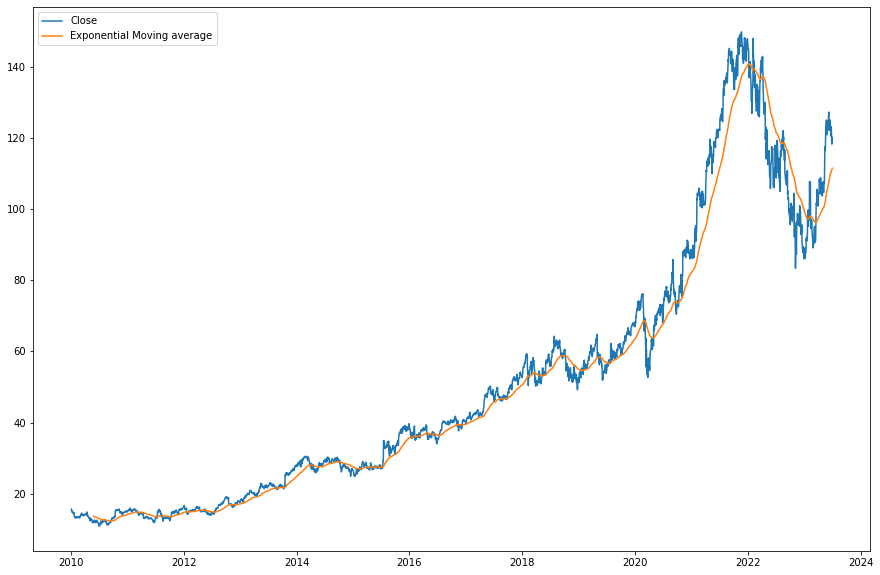

,Open,High,Low,Close,Adj Close,Volume,SMA,EMA
Date,,,,,,,,
2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752,NaN,NaN
2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812,NaN,NaN
2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852,NaN,NaN
2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428,NaN,NaN
2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-06-23,121.379997,122.790001,121.059998,122.339996,122.339996,34885300,107.2686,110.893129
2023-06-26,120.760002,122.000000,118.269997,118.339996,118.339996,33969900,107.4636,111.040592
2023-06-27,117.080002,119.080002,116.099998,118.330002,118.330002,39535900,107.6426,111.184936


In [11]:
exponential_moving_average(df, 100)

Let us plot RSI indicator, RSI indicator is a type of momentum indicator, it is used to determine whether a stock is undervalued or overvalued. 

In [12]:
def rsi_plot(data, n=14):
    import talib as ta
    import matplotlib.pyplot as plt
    data['RSI'] = ta.RSI(data['Close'])
    
    fig, ax = plt.subplots(2, 1, gridspec_kw={"height_ratios":[3,1]}, figsize=(15,10))
    ax[0].plot(data['Close'])
    ax[1].axhline(y=70, color="r", linestyle="--")
    ax[1].axhline(y=30, color="g", linestyle="-")
    ax[1].plot(data['RSI'], color="blue")

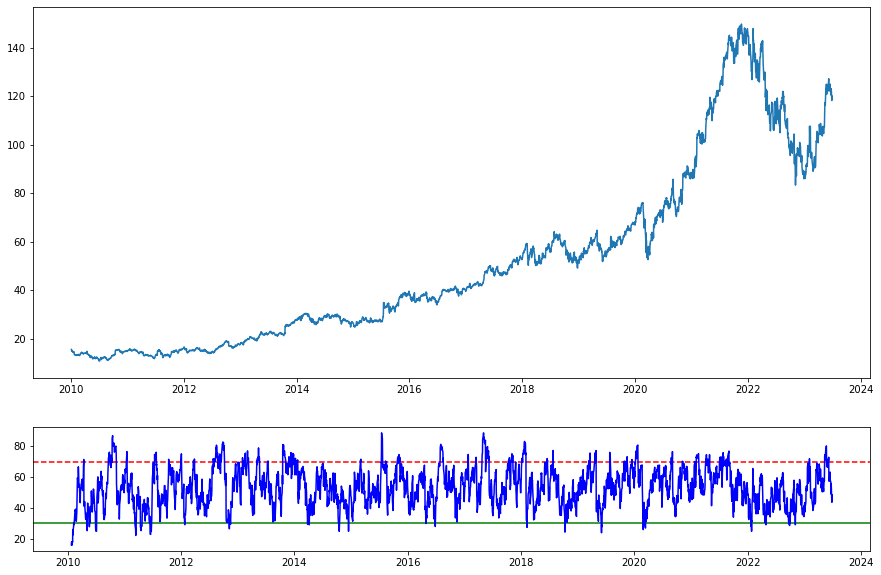

In [13]:
rsi_plot(df)

Let us now plot linear regression. 

In [14]:
def linear_reg(data, n):
    import talib as ta
    import matplotlib.pyplot as plt
    
    data["Linear_reg"] = ta.LINEARREG(data['Close'], n)
    
    plt.figure(figsize=(15,10))
    plt.plot(data['Close'])
    plt.plot(data["Linear_reg"])
    plt.legend(["Close", "Linear regression"], loc="upper left")
    plt.show()

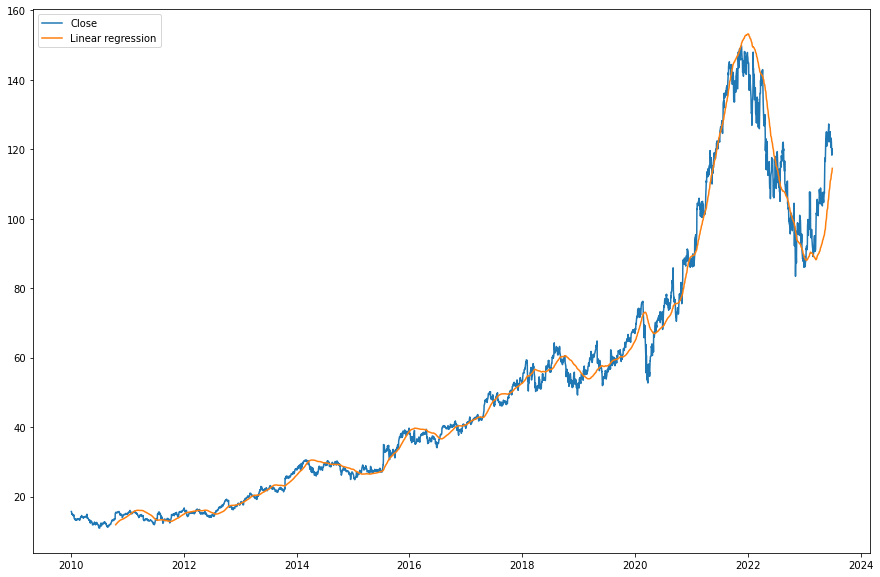

In [15]:
linear_reg(df, 200)

We will be plotting MACD indicator for this stock. MACD is a trend following momentum indicator, this shows the relationship between two exponential moving averages. 

In [16]:
def macd_indicator(data):
    import talib as ta
    import datetime as dt
    import matplotlib.pyplot as plt
    import yfinance as yf
    from pandas_datareader import data as pdr
    
    yf.pdr_override()
    n = input("Enter do you want to set a specific start date? y/n:")
    if n == "y":
        n1 = int(input("Enter year in format YYYY"))
        n2 = int(input("Enter month, enter 1 for January, 2 for February:"))
        n3 = int(input("Enter date:"))
        
        start_date = dt.datetime(n1,n2,n3)
    else:
        start_date = dt.datetime(2021,1,1)
        
    data1 = pdr.get_data_yahoo(data,start=start_date, end=dt.datetime.now())
    
    macd, macd_signal, macd_hist = ta.MACD(data1['Close'])
    
    fig, ax = plt.subplots(2,1,gridspec_kw={"height_ratios":[3,1]}, figsize=(15,10))
    
    c = ["red" if cl<0 else "green" for cl in macd_hist]
    
    ax[0].plot(data1["Close"])
    ax[1].plot(macd, "b-")
    ax[1].plot(macd_signal, "--", color="orange")
    ax[1].bar(macd_hist.index, macd_hist, color=c)

Enter do you want to set a specific start date? y/n:n
[*********************100%***********************]  1 of 1 completed


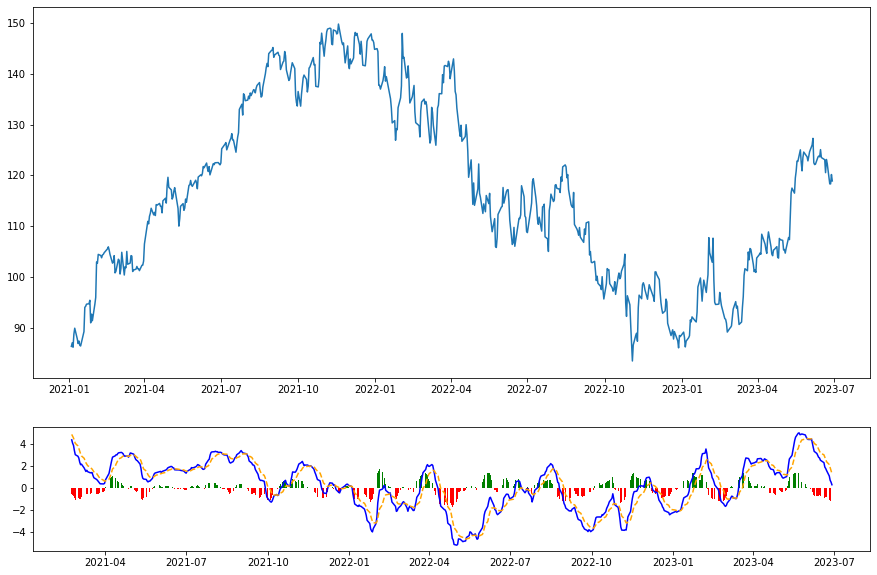

In [17]:
macd_indicator("GOOGL")

Let us now plot engulfing indicator, we will also be plotting the candlestick graph.

In [18]:
start = dt.datetime(2023,4,1)
end = dt.datetime.now()
import talib as ta 

data = pdr.get_data_yahoo("GOOGL", start, end)

data['ENGULFING'] = ta.CDLENGULFING(data['Open'],data['High'],data['Low'],data['Close'])
data

# CDLENGULFING return -100 to indicate bearish trend, 100 for bullish and 0 for no trend

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,ENGULFING
Date,,,,,,,
2023-04-03,102.389999,104.529999,101.930000,104.360001,104.360001,25035400,0
2023-04-04,104.330002,105.580002,104.040001,104.720001,104.720001,24420100,0
2023-04-05,105.779999,106.099998,103.660004,104.470001,104.470001,28290500,0
2023-04-06,105.260002,109.169998,104.330002,108.419998,108.419998,48711500,0
2023-04-10,106.980003,107.589996,105.120003,106.440002,106.440002,27067400,0
...,...,...,...,...,...,...,...
2023-06-23,121.379997,122.790001,121.059998,122.339996,122.339996,34885300,0
2023-06-26,120.760002,122.000000,118.269997,118.339996,118.339996,33969900,0
2023-06-27,117.080002,119.080002,116.099998,118.330002,118.330002,39535900,0


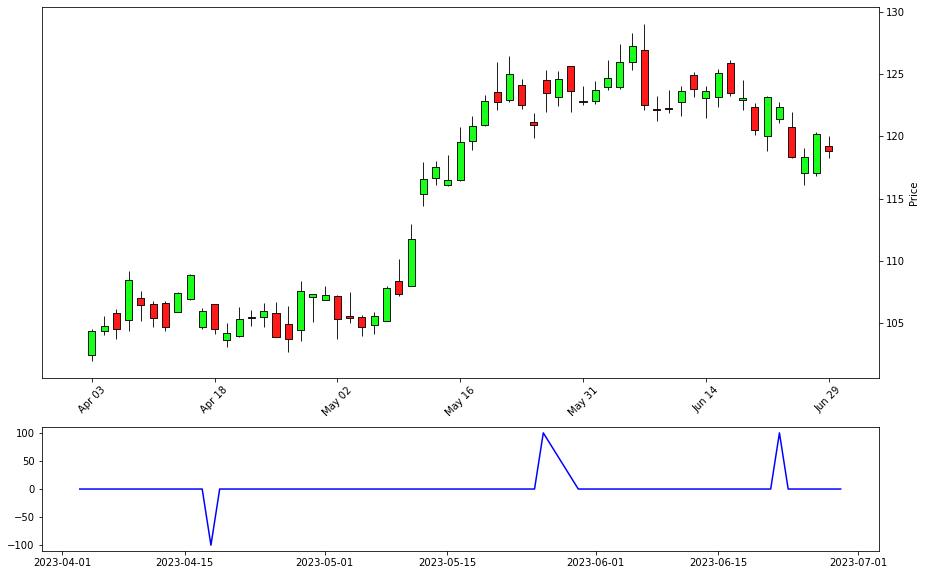

In [19]:
# plotting the candlestick graph and engulfing indicator
import mplfinance as mpf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1,gridspec_kw={"height_ratios":[3,1]}, figsize=(15,10))

colors = mpf.make_marketcolors(up="#00ff00", down="#ff0000")
mpf_style = mpf.make_mpf_style(base_mpf_style="yahoo", marketcolors = colors)
mpf.plot(data, type="candle", ax=ax[0], style=mpf_style)
ax[1].plot(data['ENGULFING'],color="blue")